In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')


In [127]:
df_raw = pd.read_parquet('../../data/02 - trusted/parquet/tb_itens.parquet')


In [132]:
df_raw.columns

Index(['ITEM', 'IDTIPOFT2', 'IDFAMILIA', 'ESTADOFT_DETEC',
       'TEXTOESTADOFT_DETEC', 'STATUSFT', 'TEXTOSTATUSFT', 'IDCLIENTE',
       'REFERENCIA', 'CODIGOREFERENCIA', 'TIPOABNT', 'EXIGELAUDO', 'GRAMATURA',
       'COLUNAMINIMO', 'COBBINTMAXIMO', 'COMPRESSAO', 'COMPOSICAO', 'LARGURA',
       'REFILOLARGURA', 'COMPRIMENTO', 'REFILOCOMPRIMENTO', 'MULTLARG',
       'MULTCOMP', 'ARRANJO', 'REFUGOCLIENTE', 'VINCOLARG1', 'VINCOLARG2',
       'VINCOLARG3', 'VINCOCOMP1', 'VINCOCOMP2', 'VINCOCOMP3', 'VINCOCOMP4',
       'VINCOCOMP5', 'LAP', 'PROLONGLAP', 'LAPNOCOMP', 'LAPINTERNO',
       'REFILADO', 'RESINAINTERNA', 'AMARRADO', 'PALETIZADO', 'PACOTESLARGURA',
       'PACOTESCOMPRIMENTO', 'PACOTESALTURA', 'PECASPORPACOTE',
       'PECASPORPALETE', 'PACOTESPORPALETE', 'UNIDADESPORPALETE', 'ESPELHO',
       'FILME', 'FACA', 'COR1', 'CONSUMOCOR1', 'COR2', 'CONSUMOCOR2', 'COR3',
       'CONSUMOCOR3', 'COR4', 'CONSUMOCOR4', 'NRCORES', 'LARGURAINTERNA',
       'COMPRIMENTOINTERNO', 'ALTURAINTERNA'

In [152]:
df_raw.REFERENCIA.unique()

array(['Nº 2', '143230', '10 Caixas de Sapato (Cx. Exp.)', ...,
       '738883 - Álcool Gel Cocamar ( 12 x 500 )',
       '930.003 - CAIXA P/INFLUENCER VALE FÉRTIL', 'Pão Premium fechada'],
      shape=(59100,), dtype=object)

In [129]:
df_raw.shape

(69774, 81)

### Informações Gerais

In [64]:
print("\n1. ESTRUTURA DOS DADOS")
print(f"Dimensões: {df_raw.shape[0]} registros x {df_raw.shape[1]} colunas")
print(f"\nTipos de dados:")
print(df_raw.dtypes.value_counts())


1. ESTRUTURA DOS DADOS
Dimensões: 69774 registros x 81 colunas

Tipos de dados:
float64    46
int64      22
object     13
Name: count, dtype: int64


### Valores Nulos

In [65]:
print("\n2. ANÁLISE DE VALORES NULOS")
nulos = df_raw.isnull().sum()
perc_nulos = (nulos / len(df_raw) * 100).round(2)
nulos_df = pd.DataFrame({
'Nulos': nulos,
'Percentual': perc_nulos
}).sort_values('Percentual', ascending=False)
print("\nCampos com mais de 50% de nulos:")
print(nulos_df[nulos_df['Percentual'] > 50])


2. ANÁLISE DE VALORES NULOS

Campos com mais de 50% de nulos:
                    Nulos  Percentual
IDTIPOFT2           69666       99.85
COMPRESSAO          68068       97.55
CONSUMOCOR1         65720       94.19
CONSUMOCOR2         62839       90.06
CONSUMOCOR3         61481       88.11
CONSUMOCOR4         59820       85.73
COR3                55593       79.68
COR4                54853       78.62
COR1                53013       75.98
COR2                52375       75.06
CODIGOREFERENCIA    51903       74.39
PATHFIGURADOLASTRO  39032       55.94
COBBINTMAXIMO       38615       55.34
FACA                37542       53.81


In [135]:
nulos_df

,Nulos,Percentual
IDTIPOFT2,69666,99.85
COMPRESSAO,68068,97.55
CONSUMOCOR1,65720,94.19
CONSUMOCOR2,62839,90.06
CONSUMOCOR3,61481,88.11
...,...,...
AREABRUTAPECACOMREFILOS,0,0.00
AREALIQUIDAPECA,0,0.00
AREABRUTAPECA,0,0.00
AREALIQUIDACHAPA,0,0.00


In [140]:
nulos_df = nulos_df[nulos_df['Nulos'] > 0]

In [142]:
import plotly.express as px

fig = px.bar(nulos_df,x=nulos_df.index, y ='Nulos', title= 'Distribuição de Valores Nulos por coluna' )
fig.show()

### ESTATÍSTICAS DESCRITIVAS - NUMÉRICOS

In [143]:
display(df_raw.describe())

,IDTIPOFT2,IDFAMILIA,ESTADOFT_DETEC,STATUSFT,IDCLIENTE,EXIGELAUDO,GRAMATURA,COLUNAMINIMO,COBBINTMAXIMO,COMPRESSAO,LARGURA,REFILOLARGURA,COMPRIMENTO,REFILOCOMPRIMENTO,MULTLARG,MULTCOMP,ARRANJO,REFUGOCLIENTE,VINCOLARG1,VINCOLARG2,VINCOLARG3,VINCOCOMP1,VINCOCOMP2,VINCOCOMP3,VINCOCOMP4,VINCOCOMP5,LAP,PROLONGLAP,LAPNOCOMP,LAPINTERNO,REFILADO,RESINAINTERNA,AMARRADO,PALETIZADO,PACOTESLARGURA,PACOTESCOMPRIMENTO,PACOTESALTURA,PECASPORPACOTE,PECASPORPALETE,PACOTESPORPALETE,UNIDADESPORPALETE,ESPELHO,FILME,CONSUMOCOR1,CONSUMOCOR2,CONSUMOCOR3,CONSUMOCOR4,NRCORES,LARGURAINTERNA,COMPRIMENTOINTERNO,ALTURAINTERNA,LARGPECA,COMPPECA,COMPPACOTE,LARGPACOTE,ALTURAPACOTE,COMMPALETEFECHADO,LARGPALETEFECHADO,ALTURAPALETEFECHADO,PESOCAIXA,IDPALETE,AREABRUTAPECACOMREFILOS,AREABRUTAPECA,AREALIQUIDAPECA,AREABRUTACHAPA,AREALIQUIDACHAPA,VOLUMEPALETEFECHADOM3,VOLUMEPACOTEFECHADOM3
count,108.0,58629.000000,69774.000000,69774.000000,69774.000000,69774.000000,38961.000000,43826.000000,31159.000000,1706.000000,69774.000000,69774.000000,69774.000000,69774.000000,69774.000000,69774.000000,69774.000000,69774.000000,38465.000000,38463.000000,35131.000000,38065.000000,37687.000000,37056.000000,35897.000000,35693.000000,69774.000000,69774.000000,69774.000000,69774.000000,69774.000000,69774.000000,69774.000000,69774.000000,64507.000000,64615.000000,66225.000000,69507.000000,63968.000000,64224.000000,63968.000000,69774.000000,69774.000000,4054.000000,6935.000000,8293.000000,9954.000000,69774.000000,69750.000000,69744.000000,69301.000000,66051.000000,6.604400e+04,3.619600e+04,3.619900e+04,36498.000000,50575.000000,50586.000000,52237.000000,35080.000000,62775.000000,69774.000000,69774.000000,69774.000000,69774.000000,69774.000000,50515.000000,36106.000000
mean,2.0,23.308482,2.143463,3.358873,6904.844627,0.606100,536.117091,6.383335,33.294843,304.630510,684.585103,5.468828,1359.487288,4.572061,1.079858,1.471279,1.649927,3.334030,139.773846,244.605309,137.901739,59.173020,265.937618,386.531385,266.076274,380.684168,15.056855,3.435162,-0.442414,0.036002,0.994196,0.136226,0.888769,0.716055,1.762072,1.931595,8.847369,27.298876,1047.562047,33.810632,1039.304198,0.706252,0.741824,504.210903,704.459697,614.387073,513.961021,0.906828,349.029075,531.346496,180.690380,653.785242,1.111055e+03,1.046372e+03,7.816240e+02,144.772618,1218.397133,983.121615,1306.361602,316.486652,51.718375,0.730005,0.724084,0.703288,0.956519,0.945267,1.696648,0.179687
std,0.0,19.745553,1.558715,0.631170,4554.456345,0.488617,5221.781686,31.949683,12.923477,148.527944,323.479646,7.589907,439.496001,6.167913,0.379808,0.884579,1.489173,4.797360,63.390415,142.409446,80.736291,190.599784,113.254013,152.118691,93.258511,145.610359,15.372512,12.634989,0.572570,0.998484,0.075966,0.343030,0.314420,0.450914,1.112709,1.145750,6.507146,20.911189,2228.202590,45.343134,1968.611799,0.506608,0.518932,833.778419,960.632008,936.694531,838.187133,1.095234,256.083511,370.300084,128.032567,319.078625,3.975189e+03,6.576478e+04,4.389037e+04,79.051240,350.398957,4347.469664,446.203927,1374.531118,62.905319,0.570170,0.570486,0.568389,0.621248,0.615343,7.401614,15.817591
min,2.0,0.000000,0.000000,0.000000,546.000000,0.000000,0.000000,0.000000,0.000000,1.300000,10.000000,0.000000,10.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000100,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000
25%,2.0,8.000000,1.000000,3.000000,1790.000000,0.000000,400.000000,4.500000,20.000000,200.000000,438.000000,0.000000,1054.000000,0.000000,1.000000,1.000000,1.000000,1.017732,106.000000,157.000000,104.000000,30.000000,208.000000,304.000000,213.000000

### ANÁLISE DE CAMPOS CATEGÓRICOS

In [ ]:
from IPython.display import display
import pandas as pd
import numpy as np
from typing import Tuple, List

def clean_numeric_and_categorical(df: pd.DataFrame,
                                  numeric_threshold: float = 0.9,
                                  inplace: bool = False,
                                  verbose: bool = True) -> Tuple[pd.DataFrame, List[str], List[str]]:
    """
    - numeric_threshold: proporção mínima de valores convertíveis para considerar uma coluna como numérica.
    - inplace: se True modifica o df recebido; se False retorna uma cópia.
    - Retorna: (df_limpo, numeric_cols, categorical_cols)
    """
    if not inplace:
        df = df.copy()

    df = df.replace(r'^\s*$', np.nan, regex=True)

    # 2) comece com colunas já numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    other_cols = [c for c in df.columns if c not in numeric_cols]

    categorical_cols = []

    # 3) tentar coerção para colunas não-numéricas (detectar numéricas escritas como string)
    for col in other_cols:
        coerced = pd.to_numeric(df[col], errors='coerce')
        prop_numeric = coerced.notna().sum() / len(df)
        if prop_numeric >= numeric_threshold:
            # considerar como numérica — substitui a coluna pelo coerced (numérico)
            df[col] = coerced
            numeric_cols.append(col)
        else:
            categorical_cols.append(col)

    # 4) preencher valores
    if numeric_cols:
        df[numeric_cols] = df[numeric_cols].fillna(0)
    if categorical_cols:
        df[categorical_cols] = df[categorical_cols].fillna('NA')

    if verbose:
        print(f"Numéricas ({len(numeric_cols)}): {numeric_cols}")
        print(f"Categóricas ({len(categorical_cols)}): {categorical_cols}")

    return df, numeric_cols, categorical_cols

df, num_cols, cat_cols = clean_numeric_and_categorical(df_raw, numeric_threshold=0.9, inplace=False)

Numéricas (69): ['IDTIPOFT2', 'IDFAMILIA', 'ESTADOFT_DETEC', 'STATUSFT', 'IDCLIENTE', 'EXIGELAUDO', 'GRAMATURA', 'COLUNAMINIMO', 'COBBINTMAXIMO', 'COMPRESSAO', 'LARGURA', 'REFILOLARGURA', 'COMPRIMENTO', 'REFILOCOMPRIMENTO', 'MULTLARG', 'MULTCOMP', 'ARRANJO', 'REFUGOCLIENTE', 'VINCOLARG1', 'VINCOLARG2', 'VINCOLARG3', 'VINCOCOMP1', 'VINCOCOMP2', 'VINCOCOMP3', 'VINCOCOMP4', 'VINCOCOMP5', 'LAP', 'PROLONGLAP', 'LAPNOCOMP', 'LAPINTERNO', 'REFILADO', 'RESINAINTERNA', 'AMARRADO', 'PALETIZADO', 'PACOTESLARGURA', 'PACOTESCOMPRIMENTO', 'PACOTESALTURA', 'PECASPORPACOTE', 'PECASPORPALETE', 'PACOTESPORPALETE', 'UNIDADESPORPALETE', 'ESPELHO', 'FILME', 'CONSUMOCOR1', 'CONSUMOCOR2', 'CONSUMOCOR3', 'CONSUMOCOR4', 'NRCORES', 'LARGURAINTERNA', 'COMPRIMENTOINTERNO', 'ALTURAINTERNA', 'LARGPECA', 'COMPPECA', 'COMPPACOTE', 'LARGPACOTE', 'ALTURAPACOTE', 'COMMPALETEFECHADO', 'LARGPALETEFECHADO', 'ALTURAPALETEFECHADO', 'PESOCAIXA', 'IDPALETE', 'AREABRUTAPECACOMREFILOS', 'AREABRUTAPECA', 'AREALIQUIDAPECA', 'AREAB

In [134]:
df[['IDTIPOFT2','IDCLIENTE','IDPALETE','IDFAMILIA','ESTADOFT_DETEC','STATUSFT','EXIGELAUDO','ITEM']] = df[['IDTIPOFT2','IDCLIENTE','IDPALETE','IDFAMILIA','ESTADOFT_DETEC','STATUSFT','EXIGELAUDO','ITEM']].astype('string')

In [69]:
df[num_cols].head()

,IDTIPOFT2,IDFAMILIA,ESTADOFT_DETEC,STATUSFT,IDCLIENTE,EXIGELAUDO,GRAMATURA,COLUNAMINIMO,COBBINTMAXIMO,COMPRESSAO,LARGURA,REFILOLARGURA,COMPRIMENTO,REFILOCOMPRIMENTO,MULTLARG,MULTCOMP,ARRANJO,REFUGOCLIENTE,VINCOLARG1,VINCOLARG2,VINCOLARG3,VINCOCOMP1,VINCOCOMP2,VINCOCOMP3,VINCOCOMP4,VINCOCOMP5,LAP,PROLONGLAP,LAPNOCOMP,LAPINTERNO,REFILADO,RESINAINTERNA,AMARRADO,PALETIZADO,PACOTESLARGURA,PACOTESCOMPRIMENTO,PACOTESALTURA,PECASPORPACOTE,PECASPORPALETE,PACOTESPORPALETE,UNIDADESPORPALETE,ESPELHO,FILME,CONSUMOCOR1,CONSUMOCOR2,CONSUMOCOR3,CONSUMOCOR4,NRCORES,LARGURAINTERNA,COMPRIMENTOINTERNO,ALTURAINTERNA,LARGPECA,COMPPECA,COMPPACOTE,LARGPACOTE,ALTURAPACOTE,COMMPALETEFECHADO,LARGPALETEFECHADO,ALTURAPALETEFECHADO,PESOCAIXA,IDPALETE,AREABRUTAPECACOMREFILOS,AREABRUTAPECA,AREALIQUIDAPECA,AREABRUTACHAPA,AREALIQUIDACHAPA,VOLUMEPALETEFECHADOM3,VOLUMEPACOTEFECHADOM3,ITEM
0,0.0,50.0,4,4,1733,0,0.0,0.0,0.0,0.0,555,0,1919,0,1,1,1,2.00,237.0,81.0,237.0,30.0,473.0,473.0,473.0,470.0,30,0,0,1,1,0,1,0,2.0,2.0,7.0,25.0,700.0,28.0,700.0,1,0,0.0,0.0,0.0,0.0,2,470.0,470.0,75.0,555.0,1919.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.065045,1.065045,1.043744,1.065045,1.065045,0.000000,0.000000,14170
1,0.0,50.0,4,4,1709,0,390.0,4.0,40.0,0.0,1098,10,846,10,2,2,4,9.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-1,-1,1,0,1,1,2.0,2.0,8.0,50.0,1600.0,32.0,1600.0,0,0,0.0,0.0,0.0,0.0,1,120.0,155.0,130.0,544.0,418.0,0.0,0.0,0.0,1100.0,836.0,1270.0,79.0,7.0,0.232227,0.227392,0.206472,0.928908,0.909568,1.167892,0.000000,142890
2,0.0,0.0,4,4,1983,0,0.0,0.0,0.0,0.0,1184,0,2135,0,1,1,1,0.00,265.0,654.0,265.0,524.0,527.0,527.0,527.0,30.0,0,0,1,1,1,0,1,0,1.0,1.0,1.0,10.0,10.0,1.0,10.0,0,0,0.0,0.0,0.0,0.0,1,520.0,520.0,640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.527840,2.527840,2.527840,2.527840,2.527840,0.000000,0.000000,143230
3,0.0,18.0,4,4,1697,0,639.0,7.5,45.0,0.0,970,0,1481,0,1,1,1,1.65,174.0,622.0,174.0,40.0,346.0,376.0,346.0,373.0,40,0,0,1,1,0,1,1,1.0,2.0,6.0,15.0,180.0,12.0,180.0,0,0,0.0,0.0,0.0,0.0,1,340.0,370.0,610.0,970.0,1481.0,722.0,970.0,186.0,1444.0,1000.0,1230.0,902.0,26.0,1.436570,1.436570,1.412867,1.436570,1.436570,1.776120,0.130263,143510
4,0.0,34.0,4,4,1698,1,519.0,6.0,45.0,0.0,854,0,2344,0,1,1,1,2.00,253.0,348.0,253.0,30.0,504.0,654.0,504.0,652.0,30,0,0,1,1,0,1,1,1.0,1.0,6.0,25.0,150.0,6.0,150.0,0,0,0.0,0.0,0.0,0.0,0,500.0,650.0,340.0,854.0,2344.0,1158.0,854.0,200.0,854.0,1158.0,1350.0,1018.0,7.0,2.001776,2.001776,1.961740,2.001776,2.001776,1.335058,0.197786,14490


O que significa as siglas ft detec

In [146]:
import os
import pandas as pd
import plotly.express as px
import plotly.io as pio

def plot_categorical_bars_plotly(
    df: pd.DataFrame,
    cat_cols,
    top_n: int = 20,
    normalize: bool = False,       # False = contagem; True = proporção
    include_na: bool = False,      # incluir NaN como categoria
    sort: str = 'count_desc',      # 'count_desc' | 'count_asc' | 'alpha'
    rotation: int = 45,            # rotação dos rótulos do eixo X
    annotate: bool = True,         # mostrar texto nas barras
    orientation: str = 'v',        # 'v' (padrão) ou 'h'
    color: str = '#4C78A8',
    template: str = 'plotly_white',
    width: int = 900,
    height: int = 400,
    show: bool = True,             # fig.show()
    renderer: str | None = None,   # ex.: 'colab', 'notebook', 'browser'
    save_dir: str | None = None,   # se definido, salva um arquivo por coluna
    file_format: str = 'html'      # 'html' | 'png' | 'svg' (png/svg requerem kaleido)
):
    """
    Plota um gráfico de barras por coluna categórica em cat_cols.
    - top_n: limita ao top N categorias mais frequentes (após ordenação)
    - normalize: True plota proporções; False plota contagens
    - include_na: inclui NaN como '<NA>' como uma categoria
    - sort: 'count_desc' (padrão), 'count_asc' ou 'alpha'
    - orientation: 'v' barras verticais, 'h' horizontais
    - save_dir + file_format para salvar as figuras (html/png/svg)
      Obs: png/svg requerem 'pip install -U kaleido'
    Retorna: lista de figuras (Plotly Figure)
    """
    figs = []

    for col in cat_cols:
        if col not in df.columns:
            continue

        s = df[col].copy()

        if include_na:
            s = s.fillna('<NA>')
        else:
            s = s.dropna()

        # Contagem e proporção
        count = s.value_counts()
        prop = s.value_counts(normalize=True)

        # Base para plotar
        plot_col = 'prop' if normalize else 'count'

        # DataFrame de apoio
        plot_df = pd.DataFrame({
            'category': count.index.astype(str),
            'count': count.values,
            'prop': prop.reindex(count.index).values
        })

        # Ordenação
        if sort == 'alpha':
            plot_df = plot_df.sort_values('category', ascending=True)
        elif sort == 'count_asc':
            plot_df = plot_df.sort_values('count', ascending=True)
        else:  # 'count_desc'
            plot_df = plot_df.sort_values('count', ascending=False)

        # Top N
        plot_df = plot_df.head(top_n)

        # Texto nas barras
        if annotate:
            if normalize:
                plot_df['text'] = (plot_df['prop'] * 100).round(1).astype(str) + '%'
            else:
                plot_df['text'] = plot_df['count'].astype(str)
        else:
            plot_df['text'] = None

        # Eixo e orientação
        if orientation == 'h':
            x_arg, y_arg = (plot_col, 'category')
        else:
            x_arg, y_arg = ('category', plot_col)

        fig = px.bar(
            plot_df,
            x=x_arg,
            y=y_arg,
            text='text' if annotate else None,
            orientation=orientation,
            color_discrete_sequence=[color],
            template=template,
            width=width,
            height=height
        )

        # Preservar a ordem das categorias
        if orientation == 'h':
            fig.update_layout(
                yaxis=dict(categoryorder='array', categoryarray=plot_df['category'].tolist())
            )
        else:
            fig.update_layout(
                xaxis=dict(categoryorder='array', categoryarray=plot_df['category'].tolist())
            )

        # Títulos e rótulos
        fig.update_layout(
            title=f"{col} - {'proporção' if normalize else 'contagem'} (top {top_n})",
            xaxis_title='Proporção' if (normalize and orientation == 'h') else ('Contagem' if (not normalize and orientation == 'h') else col),
            yaxis_title='Proporção' if (normalize and orientation == 'v') else ('Contagem' if (not normalize and orientation == 'v') else col),
            margin=dict(l=40, r=20, t=60, b=80)
        )

        # Rotação dos ticks (apenas para barras verticais)
        if orientation == 'v':
            fig.update_layout(xaxis_tickangle=rotation)

        # Posição do texto
        if annotate:
            fig.update_traces(
                textposition='outside' if orientation == 'v' else 'auto'
            )

        # Salvar
        if save_dir:
            os.makedirs(save_dir, exist_ok=True)
            fname_base = f"{col}.{file_format}".replace(os.sep, "_")
            path = os.path.join(save_dir, fname_base)
            if file_format == 'html':
                pio.write_html(fig, file=path, auto_open=False, include_plotlyjs='cdn')
            elif file_format in ('png', 'svg'):
                # requer: pip install -U kaleido
                pio.write_image(fig, file=path, scale=2)
            else:
                raise ValueError("file_format deve ser 'html', 'png' ou 'svg'.")

        if show:
            fig.show(renderer=renderer)

        figs.append(fig)

    return figs

In [150]:



plot_categorical_bars_plotly(
    df,
    cat_cols,
    top_n=15,
    normalize=True,
    include_na=False,
    sort='count_desc',
    orientation='h',
    save_dir='figs_html',
    file_format='html'
)

[Figure({
     'data': [{'hovertemplate': 'prop=%{x}<br>category=%{y}<br>text=%{text}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#4C78A8', 'pattern': {'shape': ''}},
               'name': '',
               'orientation': 'h',
               'showlegend': False,
               'text': array(['28.4%', '24.1%', '20.4%', '14.8%', '12.4%'], dtype=object),
               'textposition': 'auto',
               'type': 'bar',
               'x': {'bdata': 'GPlqglUt0j+Iq9A9KMzOP/XEIcpqIco/ooic9G/hwj9fKTb9o6y/Pw==', 'dtype': 'f8'},
               'xaxis': 'x',
               'y': array(['Desativada', 'Amostra', 'Suspenso', 'Desenvolvimento', 'Ativa'],
                          dtype=object),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'height': 400,
                'legend': {'tracegroupgap': 0},
                'margin': {'b': 80, 'l': 40, 'r': 20, 't': 60},
                'template': '...',
               

In [81]:
dims = ['LARGURAINTERNA', 'COMPRIMENTOINTERNO', 'ALTURAINTERNA']
for dim in dims:
    if dim in df.columns:
        print(f"\n{dim}:")
        print(f"  Min: {df[dim].min()}")
        print(f"  Max: {df[dim].max()}")
        print(f"  Média: {df[dim].mean():.2f}")
        print(f"  Mediana: {df[dim].median():.2f}")
        print(f"  Desvio Padrão: {df[dim].std():.2f}")


LARGURAINTERNA:
  Min: 0.0
  Max: 2450.0
  Média: 348.91
  Mediana: 300.00
  Desvio Padrão: 256.12

COMPRIMENTOINTERNO:
  Min: 0.0
  Max: 3600.0
  Média: 531.12
  Mediana: 449.00
  Desvio Padrão: 370.38

ALTURAINTERNA:
  Min: 0.0
  Max: 2000.0
  Média: 179.47
  Mediana: 156.00
  Desvio Padrão: 128.46


In [82]:
print("\n6. APROVEITAMENTO DE ÁREA")
df['APROVEITAMENTO_perc'] = (df['AREALIQUIDAPECA'] / df['AREABRUTAPECA'] * 100)
display(df['APROVEITAMENTO_perc'].describe().T)


6. APROVEITAMENTO DE ÁREA


count    69773.000000
mean        96.665922
std          4.797378
min         38.000000
25%         97.000000
50%         98.000000
75%         98.982268
max        100.000000
Name: APROVEITAMENTO_perc, dtype: float64

In [84]:
print("\nDistribuição de APROVEITAMENTO_perc:")
print(f"  ≥95%: {(df['APROVEITAMENTO_perc'] >= 95).sum()} ({(df['APROVEITAMENTO_perc'] >= 95).sum()/len(df)*100:.2f}%)")
print(f"  90-95%: {((df['APROVEITAMENTO_perc'] >= 90) & (df['APROVEITAMENTO_perc'] < 95)).sum()}")
print(f"  85-90%: {((df['APROVEITAMENTO_perc'] >= 85) & (df['APROVEITAMENTO_perc'] < 90)).sum()}")
print(f"  <85%: {(df['APROVEITAMENTO_perc'] < 85).sum()}")


Distribuição de APROVEITAMENTO_perc:
  ≥95%: 58839 (84.33%)
  90-95%: 4941
  85-90%: 3149
  <85%: 2844


In [85]:
print("\n7. ANÁLISE DE REFUGO")
refugo_valido = df[df['REFUGOCLIENTE'] > 0]['REFUGOCLIENTE']
print(f"Registros com refugo > 0: {len(refugo_valido)} ({len(refugo_valido)/len(df)*100:.2f}%)")
print(f"Refugo médio: {refugo_valido.mean():.2f}%")
print(f"Refugo máximo: {refugo_valido.max():.2f}%")


7. ANÁLISE DE REFUGO
Registros com refugo > 0: 56339 (80.74%)
Refugo médio: 4.13%
Refugo máximo: 62.00%


In [86]:
print("\nDistribuição de refugo:")
print(f"  ≤5%: {(refugo_valido <= 5).sum()} ({(refugo_valido <= 5).sum()/len(refugo_valido)*100:.2f}%)")
print(f"  5-10%: {((refugo_valido > 5) & (refugo_valido <= 10)).sum()}")
print(f"  >10%: {(refugo_valido > 10).sum()}")


Distribuição de refugo:
  ≤5%: 45425 (80.63%)
  5-10%: 4928
  >10%: 5986


In [87]:
print("\n8. PALETIZAÇÃO")
palet_campos = ['PECASPORPACOTE', 'PACOTESPORPALETE', 'PECASPORPALETE']
for campo in palet_campos:
    if campo in df.columns:
        print(f"\n{campo}:")
        print(f"  Média: {df[campo].mean():.2f}")
        print(f"  Mediana: {df[campo].median():.2f}")


8. PALETIZAÇÃO

PECASPORPACOTE:
  Média: 27.19
  Mediana: 25.00

PACOTESPORPALETE:
  Média: 31.12
  Mediana: 24.00

PECASPORPALETE:
  Média: 960.39
  Mediana: 600.00


In [90]:
print("\n9. FLAGS DE PROCESSO")
flags = ['REFILADO', 'AMARRADO', 'PALETIZADO', 'ESPELHO', 'FILME']



9. FLAGS DE PROCESSO


In [91]:
df.rename(columns = {'REFILADO':'FLAG_REFILADO', 'AMARRADO':'FLAG_AMARRADO', 'PALETIZADO':'FLAG_PALETIZADO', 'ESPELHO':'FLAG_ESPELHO', 'FILME':'FLAG_FILME'}, inplace = True)

In [92]:
flags = ['FLAG_REFILADO', 'FLAG_AMARRADO', 'FLAG_PALETIZADO', 'FLAG_ESPELHO', 'FLAG_FILME']

In [93]:
df[flags]

,FLAG_REFILADO,FLAG_AMARRADO,FLAG_PALETIZADO,FLAG_ESPELHO,FLAG_FILME
0,1,1,0,1,0
1,1,1,1,0,0
2,1,1,0,0,0
3,1,1,1,0,0
4,1,1,1,0,0
...,...,...,...,...,...
69769,1,1,1,1,1
69770,1,1,1,1,1
69771,1,1,1,1,1
69772,1,1,1,1,1


In [94]:
for flag in flags:
    if flag in df.columns:
        qtd = (df[flag] == 1).sum()
        print(f"{flag} é 1: {qtd} ({qtd/len(df)*100:.2f}%)")

FLAG_REFILADO é 1: 69369 (99.42%)
FLAG_AMARRADO é 1: 62013 (88.88%)
FLAG_PALETIZADO é 1: 49962 (71.61%)
FLAG_ESPELHO é 1: 47454 (68.01%)
FLAG_FILME é 1: 47501 (68.08%)


In [95]:
print("\n10. MULTIPLICADORES E ARRANJO")
if all(col in df.columns 
    for col in ['MULTLARG', 'MULTCOMP', 'ARRANJO']):
        print("\nDistribuição MULTLARG:")
        print(df['MULTLARG'].value_counts().head(10))
        print("\nDistribuição MULTCOMP:")
        print(df['MULTCOMP'].value_counts().head(10))

        print("\nTop 10 Arranjos:")
        print(df['ARRANJO'].value_counts().head(10))

        # Validar se ARRANJO = MULTLARG × MULTCOMP
        df['ARRANJO_CALC'] = df['MULTLARG'] * df['MULTCOMP']
        corretos = (df['ARRANJO'] == df['ARRANJO_CALC']).sum()
        print(f"\nValidação ARRANJO = MULTLARG × MULTCOMP: {corretos}/{len(df)} corretos")


10. MULTIPLICADORES E ARRANJO

Distribuição MULTLARG:
MULTLARG
1     65677
2      3179
3       580
4       236
5        41
6        36
9        11
7         7
8         6
10        1
Name: count, dtype: int64

Distribuição MULTCOMP:
MULTCOMP
1     49174
2     12961
3      4171
4      2620
5       597
6       221
8        12
7         7
10        5
9         4
Name: count, dtype: int64

Top 10 Arranjos:
ARRANJO
1     48081
2     12096
4      3613
3      3546
6      1061
5       538
8       414
9       120
12      114
10       71
Name: count, dtype: int64

Validação ARRANJO = MULTLARG × MULTCOMP: 69774/69774 corretos


In [96]:
df[['MULTLARG', 'MULTCOMP', 'ARRANJO','ARRANJO_CALC']].sort_values('ARRANJO_CALC')

,MULTLARG,MULTCOMP,ARRANJO,ARRANJO_CALC
48,1,1,1,1
69747,1,1,1,1
69748,1,1,1,1
69749,1,1,1,1
69750,1,1,1,1
...,...,...,...,...
44235,9,4,36,36
41286,9,4,36,36
41282,9,4,36,36
41279,9,4,36,36


In [97]:
print("\n11. TOP 10 CLIENTES")
if 'IDCLIENTE' in df.columns:
    print(df['IDCLIENTE'].value_counts().head(10))


11. TOP 10 CLIENTES
IDCLIENTE
11572    1181
5736      903
1820      635
6636      539
1824      488
1428      455
1711      431
1705      430
1895      391
1870      374
Name: count, dtype: Int64


In [98]:
print("\n12. CORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS")
campos_numericos = df.select_dtypes(include=[np.number]).columns
if len(campos_numericos) > 0:
    corr_matrix = df[campos_numericos].corr()
    # Principais correlações (excluindo diagonal)
    correlacoes = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            correlacoes.append({
                'Campo1': corr_matrix.columns[i],
                'Campo2': corr_matrix.columns[j],
                'Correlacao': corr_matrix.iloc[i, j]
            })

    corr_df = pd.DataFrame(correlacoes).sort_values('Correlacao', 
                                                    key=abs, 
                                                    ascending=False)
    print("\nTop 10 correlações mais fortes:")
    print(corr_df[corr_df['Correlacao'].abs() >0.7])



12. CORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS

Top 10 correlações mais fortes:
                       Campo1               Campo2  Correlacao
637                   ARRANJO         ARRANJO_CALC    1.000000
688             REFUGOCLIENTE  APROVEITAMENTO_perc   -1.000000
1980  AREABRUTAPECACOMREFILOS        AREABRUTAPECA    0.999875
2001           AREABRUTACHAPA     AREALIQUIDACHAPA    0.999707
1988            AREABRUTAPECA      AREALIQUIDAPECA    0.998331
...                       ...                  ...         ...
893                VINCOCOMP2            LAPNOCOMP    0.718295
1028               VINCOCOMP5            LAPNOCOMP    0.712857
744                VINCOLARG2           VINCOCOMP3    0.703619
1372          FLAG_PALETIZADO    COMMPALETEFECHADO    0.701685
1819       COMPRIMENTOINTERNO      AREALIQUIDAPECA    0.701257

[62 rows x 3 columns]


In [99]:
corr_df[corr_df['Correlacao'].abs() >0.7] 

,Campo1,Campo2,Correlacao
637,ARRANJO,ARRANJO_CALC,1.000000
688,REFUGOCLIENTE,APROVEITAMENTO_perc,-1.000000
1980,AREABRUTAPECACOMREFILOS,AREABRUTAPECA,0.999875
2001,AREABRUTACHAPA,AREALIQUIDACHAPA,0.999707
1988,AREABRUTAPECA,AREALIQUIDAPECA,0.998331
...,...,...,...
893,VINCOCOMP2,LAPNOCOMP,0.718295
1028,VINCOCOMP5,LAPNOCOMP,0.712857
744,VINCOLARG2,VINCOCOMP3,0.703619
1372,FLAG_PALETIZADO,COMMPALETEFECHADO,0.701685


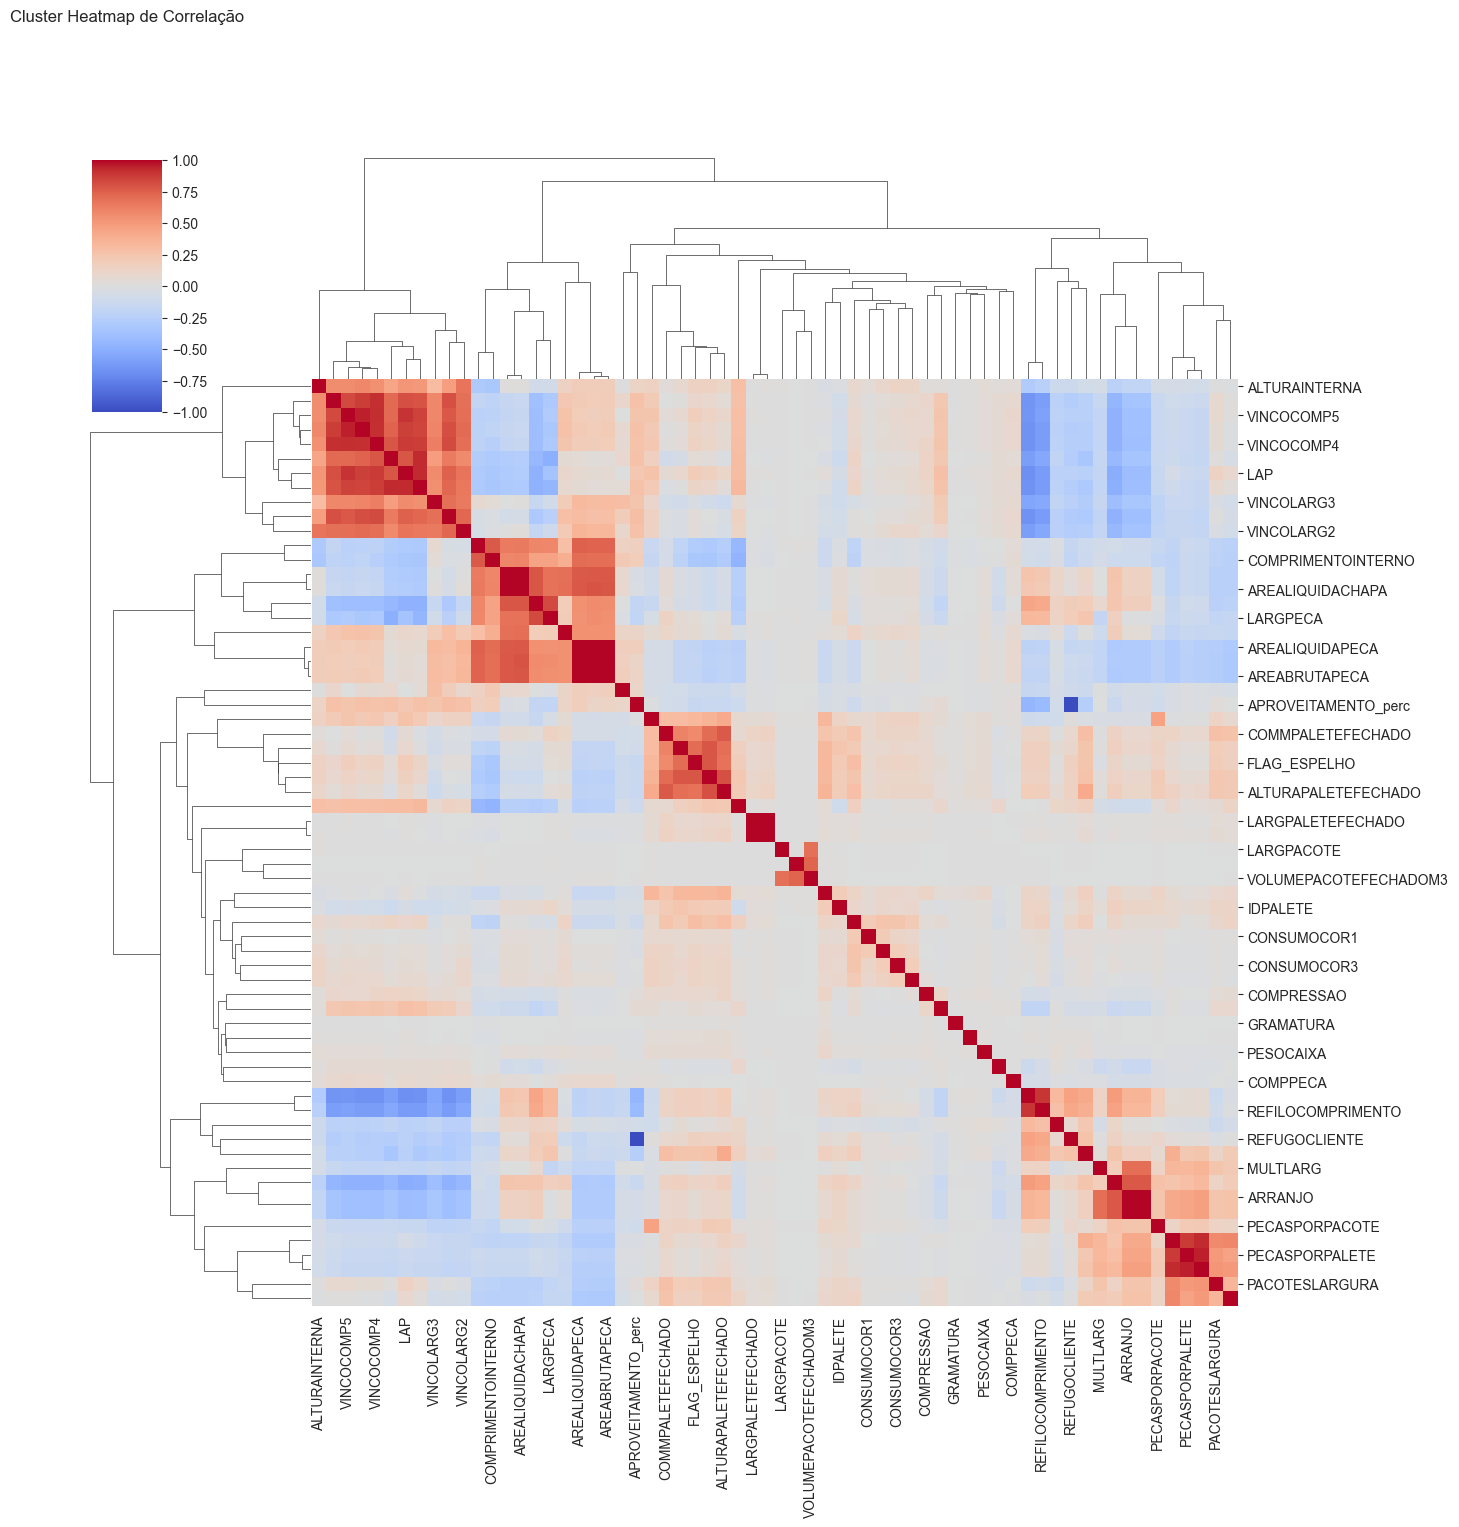

In [100]:
sns.clustermap(corr_matrix, cmap='coolwarm', center=0, figsize=(14, 14))
plt.title('Cluster Heatmap de Correlação', pad=100)
plt.show()


In [101]:
df['ITEM']

0         14170
1        142890
2        143230
3        143510
4         14490
          ...  
69769    902050
69770    902060
69771    902070
69772    902080
69773    902090
Name: ITEM, Length: 69774, dtype: string

LAP é a aba de colagem da caixa de papelão - a parte que sobrepõe e é colada para fechar a caixa

In [104]:
df[corr_matrix.columns].head()

,GRAMATURA,COLUNAMINIMO,COBBINTMAXIMO,COMPRESSAO,LARGURA,REFILOLARGURA,COMPRIMENTO,REFILOCOMPRIMENTO,MULTLARG,MULTCOMP,ARRANJO,REFUGOCLIENTE,VINCOLARG1,VINCOLARG2,VINCOLARG3,VINCOCOMP1,VINCOCOMP2,VINCOCOMP3,VINCOCOMP4,VINCOCOMP5,LAP,PROLONGLAP,LAPNOCOMP,LAPINTERNO,FLAG_REFILADO,RESINAINTERNA,FLAG_AMARRADO,FLAG_PALETIZADO,PACOTESLARGURA,PACOTESCOMPRIMENTO,PACOTESALTURA,PECASPORPACOTE,PECASPORPALETE,PACOTESPORPALETE,UNIDADESPORPALETE,FLAG_ESPELHO,FLAG_FILME,CONSUMOCOR1,CONSUMOCOR2,CONSUMOCOR3,CONSUMOCOR4,NRCORES,LARGURAINTERNA,COMPRIMENTOINTERNO,ALTURAINTERNA,LARGPECA,COMPPECA,COMPPACOTE,LARGPACOTE,ALTURAPACOTE,COMMPALETEFECHADO,LARGPALETEFECHADO,ALTURAPALETEFECHADO,PESOCAIXA,IDPALETE,AREABRUTAPECACOMREFILOS,AREABRUTAPECA,AREALIQUIDAPECA,AREABRUTACHAPA,AREALIQUIDACHAPA,VOLUMEPALETEFECHADOM3,VOLUMEPACOTEFECHADOM3,APROVEITAMENTO_perc,ARRANJO_CALC
0,0.0,0.0,0.0,0.0,555,0,1919,0,1,1,1,2.00,237.0,81.0,237.0,30.0,473.0,473.0,473.0,470.0,30,0,0,1,1,0,1,0,2.0,2.0,7.0,25.0,700.0,28.0,700.0,1,0,0.0,0.0,0.0,0.0,2,470.0,470.0,75.0,555.0,1919.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.065045,1.065045,1.043744,1.065045,1.065045,0.000000,0.000000,98.00,1
1,390.0,4.0,40.0,0.0,1098,10,846,10,2,2,4,9.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-1,-1,1,0,1,1,2.0,2.0,8.0,50.0,1600.0,32.0,1600.0,0,0,0.0,0.0,0.0,0.0,1,120.0,155.0,130.0,544.0,418.0,0.0,0.0,0.0,1100.0,836.0,1270.0,79.0,7.0,0.232227,0.227392,0.206472,0.928908,0.909568,1.167892,0.000000,90.80,4
2,0.0,0.0,0.0,0.0,1184,0,2135,0,1,1,1,0.00,265.0,654.0,265.0,524.0,527.0,527.0,527.0,30.0,0,0,1,1,1,0,1,0,1.0,1.0,1.0,10.0,10.0,1.0,10.0,0,0,0.0,0.0,0.0,0.0,1,520.0,520.0,640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.527840,2.527840,2.527840,2.527840,2.527840,0.000000,0.000000,100.00,1
3,639.0,7.5,45.0,0.0,970,0,1481,0,1,1,1,1.65,174.0,622.0,174.0,40.0,346.0,376.0,346.0,373.0,40,0,0,1,1,0,1,1,1.0,2.0,6.0,15.0,180.0,12.0,180.0,0,0,0.0,0.0,0.0,0.0,1,340.0,370.0,610.0,970.0,1481.0,722.0,970.0,186.0,1444.0,1000.0,1230.0,902.0,26.0,1.436570,1.436570,1.412867,1.436570,1.436570,1.776120,0.130263,98.35,1
4,519.0,6.0,45.0,0.0,854,0,2344,0,1,1,1,2.00,253.0,348.0,253.0,30.0,504.0,654.0,504.0,652.0,30,0,0,1,1,0,1,1,1.0,1.0,6.0,25.0,150.0,6.0,150.0,0,0,0.0,0.0,0.0,0.0,0,500.0,650.0,340.0,854.0,2344.0,1158.0,854.0,200.0,854.0,1158.0,1350.0,1018.0,7.0,2.001776,2.001776,1.961740,2.001776,2.001776,1.335058,0.197786,98.00,1


In [105]:
corr_matrix

,GRAMATURA,COLUNAMINIMO,COBBINTMAXIMO,COMPRESSAO,LARGURA,REFILOLARGURA,COMPRIMENTO,REFILOCOMPRIMENTO,MULTLARG,MULTCOMP,ARRANJO,REFUGOCLIENTE,VINCOLARG1,VINCOLARG2,VINCOLARG3,VINCOCOMP1,VINCOCOMP2,VINCOCOMP3,VINCOCOMP4,VINCOCOMP5,LAP,PROLONGLAP,LAPNOCOMP,LAPINTERNO,FLAG_REFILADO,RESINAINTERNA,FLAG_AMARRADO,FLAG_PALETIZADO,PACOTESLARGURA,PACOTESCOMPRIMENTO,PACOTESALTURA,PECASPORPACOTE,PECASPORPALETE,PACOTESPORPALETE,UNIDADESPORPALETE,FLAG_ESPELHO,FLAG_FILME,CONSUMOCOR1,CONSUMOCOR2,CONSUMOCOR3,CONSUMOCOR4,NRCORES,LARGURAINTERNA,COMPRIMENTOINTERNO,ALTURAINTERNA,LARGPECA,COMPPECA,COMPPACOTE,LARGPACOTE,ALTURAPACOTE,COMMPALETEFECHADO,LARGPALETEFECHADO,ALTURAPALETEFECHADO,PESOCAIXA,IDPALETE,AREABRUTAPECACOMREFILOS,AREABRUTAPECA,AREALIQUIDAPECA,AREABRUTACHAPA,AREALIQUIDACHAPA,VOLUMEPALETEFECHADOM3,VOLUMEPACOTEFECHADOM3,APROVEITAMENTO_perc,ARRANJO_CALC
GRAMATURA,1.000000,0.007581,0.035126,0.011222,-0.002190,0.008021,0.004492,0.005828,-0.004152,0.003642,-0.000429,0.003176,-0.001266,-0.003345,-0.002610,-0.004699,0.001188,0.002116,0.001722,0.003565,0.005081,0.003816,-0.002136,0.000662,0.000104,0.014964,0.009576,0.012044,-0.000917,-0.001371,0.004994,0.000996,-0.003783,-0.003189,-0.004092,0.012681,0.013309,0.002175,0.002912,0.002806,0.002336,0.003502,-0.008986,-0.008807,0.001497,-0.000668,-0.000569,0.000189,0.000669,0.014301,0.009317,0.001473,0.015629,0.011949,0.005864,-0.006311,-0.006412,-0.006672,-0.000308,-0.000553,0.002141,0.000453,-0.003176,-0.000429
COLUNAMINIMO,0.007581,1.000000,0.058873,0.018142,-0.003366,0.016476,0.005696,0.013146,-0.008622,0.001125,-0.004853,0.016318,0.003649,-0.003069,-0.006346,-0.012904,0.010403,0.012026,0.012077,0.015506,0.017017,0.010746,0.000758,0.007513,0.001687,0.018290,0.021202,0.047066,0.006623,0.006892,0.023346,0.005336,-0.005015,-0.001719,-0.005532,0.046133,0.043909,0.004311,0.007716,0.010038,0.009418,0.012038,-0.023924,-0.025281,0.012397,0.007206,0.000980,0.000374,0.001425,0.040542,0.034513,0.005045,0.050254,0.018511,0.015574,-0.011298,-0.011606,-0.012950,-0.004911,-0.005413,0.006480,0.000762,-0.016316,-0.004853
COBBINTMAXIMO,0.035126,0.058873,1.000000,0.122742,-0.050121,0.116183,0.022032,0.087428,0.000475,0.119232,0.070247,0.055443,-0.054614,-0.071558,-0.059523,-0.075585,-0.019830,-0.017036,-0.006202,0.005128,0.029688,0.040092,-0.038329,-0.011258,-0.027297,-0.034370,0.045150,0.324964,0.085009,0.096418,0.158628,0.124631,0.026086,0.051944,0.032304,0.333232,0.327629,0.061811,0.089524,0.097387,0.081214,0.124008,-0.127727,-0.131746,-0.035172,0.006780,-0.004945,0.009017,0.008500,0.340911,0.254242,0.035964,0.356137,0.093190,0.193926,-0.139370,-0.140072,-0.141888,-0.031832,-0.035423,0.046650,0.008905,-0.055435,0.070247
COMPRESSAO,0.011222,0.018142,0.122742,1.000000,-0.080974,-0.071327,0.006605,-0.066230,-0.016330,-0.045630,-0.039768,-0.025346,0.063719,0.040646,0.057563,-0.000475,0.100083,0.081469,0.110596,0.083626,0.121495,0.102248,0.129966,0.106001,0.010848,-0.027992,0.026565,0.073014,0.046049,0.047057,-0.014660,-0.015933,-0.006773,0.010877,-0.007192,0.081537,0.079852,0.006450,-0.007107,0.002295,0.032106,0.040517,-0.054907,-0.049506,0.019953,-0.057222,0.007720,-0.000361,-0.000455,0.077970,0.066940,0.010049,0.116312,0.031506,0.006711,-0.027827,-0.026729,-0.025420,-0.056276,-0.055102,0.017200,-0.000656,0.025347,-0.039768
LARGURA,-0.002190,-0.003366,-0.050121,-0.080974,1.000000,0.442661,0.181720,0.420013,0.084335,0.235261,0.170342,0.172467,-0.317627,-0.170007,-0.153141,-0.006396,-0.387413,-0.404192,-0.406190,-0.406157,-0.488889,-0.180236,-0.439313,-0.491722,-0.106681,0.140260,-0.273327,-0.109610,-0.240576,-0.221573,0.182387,-0.008669,-0.098717,-0.157005,-0.108480,-0.065983,-0.058857,0.027240,0.021138,0.017069,0.033799,-0.038288,0.590054,0.448321,-0.090928,0.828936,-0.007586,0.007651,0.003152,-0.154241,0.030920,-0.003591,-0.072843,0.020366,0.067124,0.564095,0.556887,0.542604,0.786447,0.781439,-0.004803,0.006803,-0.172452,0.170342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [106]:
import numpy as np
import pandas as pd

def topN_per_feature(corr: pd.DataFrame, n: int = 3, absolute: bool = True) -> pd.DataFrame:
    """
    Retorna, para cada feature (coluna), as N features mais correlacionadas.
    - absolute=True usa |correlação| para ranquear, mas mantém o sinal na coluna 'corr'.
    Saída: colunas ['feature', 'partner', 'corr', 'corr_abs']
    """
    cm = corr.copy()
    np.fill_diagonal(cm.values, np.nan)  # ignora autocorrelação
    measure = cm.abs() if absolute else cm

    rows = []
    for col in cm.columns:
        s = measure[col].nlargest(n).dropna()
        # s tem os top N índices (features) e valores (|corr| ou corr)
        for idx, v in s.items():
            rows.append({
                'feature': col,
                'partner': idx,
                'corr_abs': float(abs(corr.loc[idx, col])),
                'corr': float(corr.loc[idx, col]),
            })
    out = pd.DataFrame(rows).sort_values(['feature', 'corr_abs'], ascending=[True, False])
    return out


def above_threshold_per_feature(corr: pd.DataFrame, thr: float = 0.7, absolute: bool = True) -> pd.DataFrame:
    """
    Retorna todas as pares com correlação acima de um limiar.
    - absolute=True aplica |corr| >= thr (recomendado).
    Saída: colunas ['feature', 'partner', 'corr', 'corr_abs'], ordenado por feature e |corr|.
    """
    cm = corr.copy()
    np.fill_diagonal(cm.values, np.nan)
    measure = cm.abs() if absolute else cm

    mask = measure >= thr
    # Transforma em formato long
    pairs = mask.stack()
    idx = pairs[pairs].index  # MultiIndex com (feature, partner)

    df = pd.DataFrame(idx.tolist(), columns=['feature', 'partner'])
    df['corr'] = df.apply(lambda r: corr.loc[r['feature'], r['partner']], axis=1)
    df['corr_abs'] = df['corr'].abs()

    df = df.sort_values(['feature', 'corr_abs'], ascending=[True, False]).reset_index(drop=True)
    return df


def top_positive_negative_per_feature(corr: pd.DataFrame, n: int = 3) -> pd.DataFrame:
    """
    Opcional: retorna, para cada feature, os top N positivos e top N negativos separadamente.
    Saída com colunas ['feature', 'partner', 'corr', 'kind'] onde kind ∈ {'positive', 'negative'}.
    """
    cm = corr.copy()
    np.fill_diagonal(cm.values, np.nan)

    rows = []
    for col in cm.columns:
        # Top N positivos
        pos = cm[col].dropna().sort_values(ascending=False).head(n)
        for idx, v in pos.items():
            rows.append({'feature': col, 'partner': idx, 'corr': float(v), 'kind': 'positive'})

        # Top N negativos
        neg = cm[col].dropna().sort_values(ascending=True).head(n)
        for idx, v in neg.items():
            rows.append({'feature': col, 'partner': idx, 'corr': float(v), 'kind': 'negative'})

    return pd.DataFrame(rows).sort_values(['feature', 'kind', 'corr'], ascending=[True, True, False]).reset_index(drop=True)

In [119]:
topn_corr_matrix = topN_per_feature(corr_matrix)
above_per_feature = above_threshold_per_feature(corr_matrix, thr=0.7)
top_positive_negative_per_feature = top_positive_negative_per_feature(corr_matrix)

In [122]:
above_per_feature.head(30)

,feature,partner,corr,corr_abs
0,ALTURAPALETEFECHADO,FLAG_PALETIZADO,0.805852,0.805852
1,ALTURAPALETEFECHADO,COMMPALETEFECHADO,0.767165,0.767165
2,APROVEITAMENTO_perc,REFUGOCLIENTE,-1.000000,1.000000
3,AREABRUTACHAPA,AREALIQUIDACHAPA,0.999707,0.999707
4,AREABRUTACHAPA,LARGURA,0.786447,0.786447
5,AREABRUTACHAPA,AREABRUTAPECACOMREFILOS,0.780498,0.780498
6,AREABRUTACHAPA,AREABRUTAPECA,0.776490,0.776490
7,AREABRUTACHAPA,AREALIQUIDAPECA,0.768980,0.768980
8,AREABRUTAPECA,AREABRUTAPECACOMREFILOS,0.999875,0.999875
9,AREABRUTAPECA,AREALIQUIDAPECA,0.998331,0.998331


In [125]:
df[df['FLAG_PALETIZADO'] == 0]

,ITEM,IDTIPOFT2,IDFAMILIA,ESTADOFT_DETEC,TEXTOESTADOFT_DETEC,STATUSFT,TEXTOSTATUSFT,IDCLIENTE,REFERENCIA,CODIGOREFERENCIA,TIPOABNT,EXIGELAUDO,GRAMATURA,COLUNAMINIMO,COBBINTMAXIMO,COMPRESSAO,COMPOSICAO,LARGURA,REFILOLARGURA,COMPRIMENTO,REFILOCOMPRIMENTO,MULTLARG,MULTCOMP,ARRANJO,REFUGOCLIENTE,VINCOLARG1,VINCOLARG2,VINCOLARG3,VINCOCOMP1,VINCOCOMP2,VINCOCOMP3,VINCOCOMP4,VINCOCOMP5,LAP,PROLONGLAP,LAPNOCOMP,LAPINTERNO,FLAG_REFILADO,RESINAINTERNA,FLAG_AMARRADO,FLAG_PALETIZADO,PACOTESLARGURA,PACOTESCOMPRIMENTO,PACOTESALTURA,PECASPORPACOTE,PECASPORPALETE,PACOTESPORPALETE,UNIDADESPORPALETE,FLAG_ESPELHO,FLAG_FILME,FACA,COR1,CONSUMOCOR1,COR2,CONSUMOCOR2,COR3,CONSUMOCOR3,COR4,CONSUMOCOR4,NRCORES,LARGURAINTERNA,COMPRIMENTOINTERNO,ALTURAINTERNA,LARGPECA,COMPPECA,COMPPACOTE,LARGPACOTE,ALTURAPACOTE,COMMPALETEFECHADO,LARGPALETEFECHADO,ALTURAPALETEFECHADO,PESOCAIXA,PATHFIGURADOLASTRO,IDPALETE,AREABRUTAPECACOMREFILOS,AREABRUTAPECA,AREALIQUIDAPECA,AREABRUTACHAPA,AREALIQUIDACHAPA,VOLUMEPALETEFECHADOM3,VOLUMEPACOTEFECHADOM3,APROVEITAMENTO_perc,ARRANJO_CALC
0,14170,0.0,50.0,4,Desativada,4,Desativada (DETEC),1733,Nº 2,02,CN,0,0.0,0.0,0.0,0.0,K2-B,555,0,1919,0,1,1,1,2.000000,237.0,81.0,237.0,30.0,473.0,473.0,473.0,470.0,30,0,0,1,1,0,1,0,2.0,2.0,7.0,25.0,700.0,28.0,700.0,1,0,NA,VERMELHO 485,0.0,PRETO,0.0,NA,0.0,NA,0.0,2,470.0,470.0,75.0,555.0,1919.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,47.0,1.065045,1.065045,1.043744,1.065045,1.065045,0.0000,0.000000,98.000000,1
2,143230,0.0,0.0,4,Desativada,4,Desativada (Clichê) Desativada (DETEC),1983,143230,NA,NA,0,0.0,0.0,0.0,0.0,A2-BC,1184,0,2135,0,1,1,1,0.000000,265.0,654.0,265.0,524.0,527.0,527.0,527.0,30.0,0,0,1,1,1,0,1,0,1.0,1.0,1.0,10.0,10.0,1.0,10.0,0,0,NA,PRETO,0.0,NA,0.0,NA,0.0,NA,0.0,1,520.0,520.0,640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,2.527840,2.527840,2.527840,2.527840,2.527840,0.0000,0.000000,100.000000,1
6,148150,0.0,0.0,4,Desativada,4,Desativada (DETEC),1645,Ref:15 - 020251 Rv-07,NA,NA,0,0.0,0.0,0.0,0.0,A2-C,349,0,1004,0,1,1,1,0.000000,83.0,183.0,83.0,322.0,164.0,324.0,164.0,30.0,0,0,1,1,1,0,1,0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0,0,NA,VERMELHO 485,0.0,PRETO,0.0,NA,0.0,NA,0.0,2,160.0,320.0,175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,0.350396,0.350396,0.350396,0.350396,0.350396,0.0000,0.000000,100.000000,1
7,151000,0.0,0.0,4,Desativada,4,Desativada (DETEC),1700,4054,NA,NA,0,0.0,0.0,0.0,0.0,K15S-C,379,0,1214,0,1,1,1,0.000000,123.0,133.0,123.0,347.0,244.0,349.0,244.0,30.0,0,0,1,1,1,0,1,0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0,0,NA,VERMELHO 485,0.0,AZUL 2,0.0,NA,0.0,NA,0.0,2,240.0,345.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,0.460106,0.460106,0.460106,0.460106,0.460106,0.0000,0.000000,100.000000,1
9,15250,0.0,0.0,4,Desativada,4,Desativada (Faca) Desativada (DETEC),1757,Brinde de Natal - Funcionarios,NA,84,0,0.0,0.0,0.0,0.0,B11-BC,652,10,968,10,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,1,0,2.0,4.0,5.0,20.0,800.0,40.0,800.0,0,0,0045,AMARELO 124,0.0,AZUL 2,0.0,MARROM 2,0.0,PRETO,0.0,4,200.0,250.0,320.0,642.0,958.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,47.0,0.631136,0.615036,0.615036,0.631136,0.615036,0.0000,0.000000,100.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69746,905870,0.0,15.0,0,Amostra,3,Suspensa (Vendas) Amostra (DETEC),10412,TAPIOCA,NA,CN,0,617.0,9.0,0.0,0.0,A15-C,473,0,1258,0,1,1,1,2.214327,122.0,229.0,122.0,30.0,245.0,370.0,245.0,368.0,30,0,0,1,1,0,1,0,0.0,0.0,6.0,25.0,0.0,0.0,0.0,1,1,NA,NA,0.0,NA,0.0,NA,0.0,NA,0.0,0,241.0,366.0,221.0,473.0,1258.0,615.0,473.0,200.0,0.0,0.0,1350.0,359.0,0.BMP,37.0,0.595034,0.595034,0.581858,0.595034,0.595034,0.0000,0.058179,97.785673,1
69747,905872,0.0,15.0,0,Amostra,3,Suspensa (Vendas) Amostra (DETEC),10412,TAPIOCA _ ACESSÓRIO,NA,29,0,369.0,4.0,0.0,0